
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [18]:
# dataset generation

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)   # Fixing seed for reproducibility
n_samples = 200   # Number of data points
X = np.random.rand(n_samples, 1) * 10  # Single feature input

# True parameters
true_w = 3.5
true_b = 2.0

y = true_w * X[:, 0] + true_b + np.random.randn(n_samples) * 2  # Generating target with noise

In [19]:
# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)   # Computing mean for each feature

        # Computing standard deviation for each feature
        self.std = np.std(X, axis=0) + 1e-8  # avoid division by zero
        return self

    def transform(self, X):
        return (X - self.mean) / self.std    # Applying standardization formula

    def fit_transform(self, X):
        self.fit(X)     # Convenience method
        return self.transform(X)


In [20]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)      # Initialized weights and bias
        self.b = 0.0

        # Store loss history
        self.losses = []

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b    # Prediction
            error = y_pred - y   # Error

            # Mean Squared Error + L2 regularization
            loss = np.mean(error ** 2) + self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

            # Gradients
            dw = (2 / n) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (2 / n) * np.sum(error)

            # Updated parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b

In [21]:
# Scale features
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# Train model
model = LinearRegressionManual(lr=0.05, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

# Predictions
y_pred = model.predict(X_scaled)

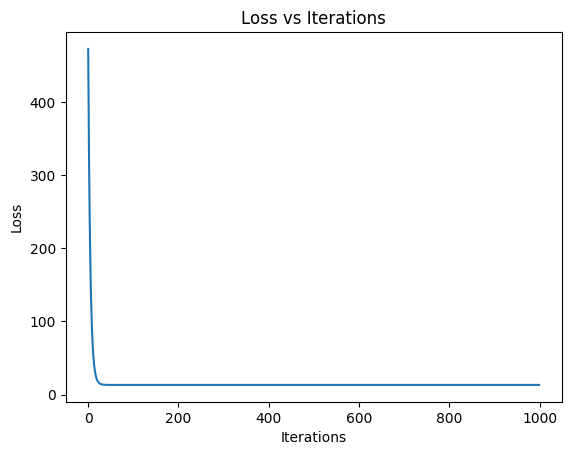

In [22]:
# Loss vs iterations
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()

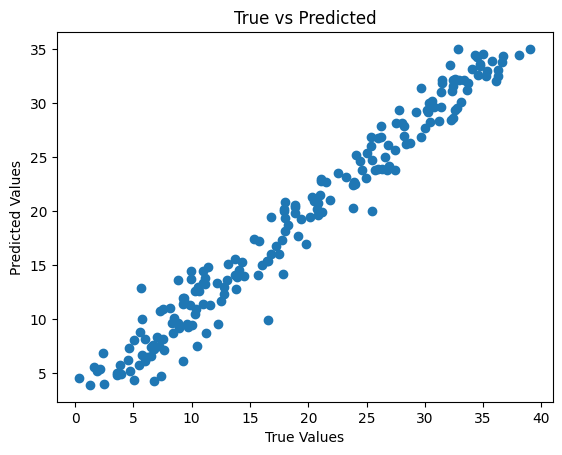

In [23]:
# True vs predicted values
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [24]:
np.random.seed(0) # Dataset generate
n_samples = 300

X = np.random.randn(n_samples, 2)   # Two features
true_w = np.array([2.0, -3.0])   # True parameters
true_b = 0.5

logits = X @ true_w + true_b  # Linear combination

probs = 1 / (1 + np.exp(-logits))   # Converted to probabilities

y = (probs >= 0.5).astype(int)  # Binary labels


In [26]:
#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [27]:
#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n, d = X.shape

        self.w = np.zeros(d)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            z = X @ self.w + self.b
            y_hat = sigmoid(z)

            # Binary Cross Entropy Loss + L2
            loss = -np.mean(
                y * np.log(y_hat + 1e-8) +
                (1 - y) * np.log(1 - y_hat + 1e-8)
            ) + self.l2_lambda * np.sum(self.w ** 2)

            self.losses.append(loss)

            # Gradients
            dw = (1 / n) * (X.T @ (y_hat - y)) + 2 * self.l2_lambda * self.w
            db = (1 / n) * np.sum(y_hat - y)

            # Updated
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


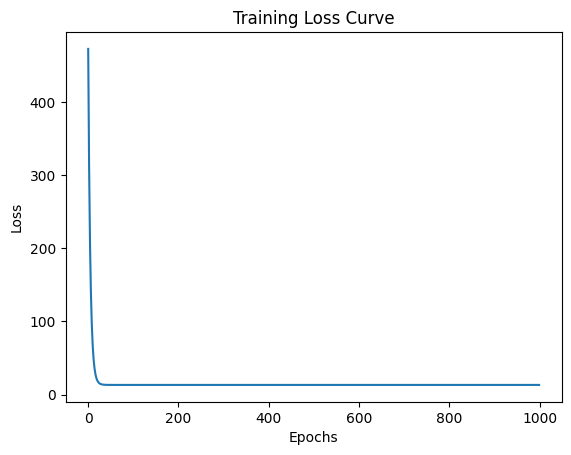

In [28]:
# Training loss curve
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


In [30]:
# Scale features
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# Train model
model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

# Predictions
y_pred = model.predict(X_scaled)

# Accuracy
accuracy = np.mean(y_pred == y)
print("Final Accuracy:", accuracy)

Final Accuracy: 0.95



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [36]:
# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    n, m = M.shape
    values = M.flatten()  # Flatten matrix values
    centroids = np.random.choice(values, k, replace=False)  # Randomly initialized centroids

    # Assignment table
    assignment = np.zeros_like(M, dtype=int)

    for _ in range(max_iters):
        for i in range(n):
            for j in range(m):
                distances = np.abs(M[i, j] - centroids)
                assignment[i, j] = np.argmin(distances)

        # Updated
        new_centroids = np.zeros(k)
        for c in range(k):
            cluster_points = M[assignment == c]
            if len(cluster_points) > 0:
                new_centroids[c] = cluster_points.mean()
            else:
                new_centroids[c] = centroids[c]

        # Check convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Build cookbook
    cookbook = {c: [] for c in range(k)}

    for i in range(n):
        for j in range(m):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    return assignment, cookbook, centroids

In [39]:
# Create random matrix
M = np.random.rand(6, 6)
k = 3

assignment_table, cookbook, centroids = kmeans_matrix(M, k)

print("Assignment Table:\n", assignment_table)

print("\nCookbook:")
for key, val in cookbook.items():
    print(key, ":", val)

print("\nCentroids:", centroids)

Assignment Table:
 [[1 1 1 0 2 1]
 [2 0 2 1 1 0]
 [2 2 2 2 0 2]
 [2 0 0 2 0 0]
 [1 0 1 2 2 0]
 [2 1 2 2 1 0]]

Cookbook:
0 : [(0, 0), (0, 3), (2, 0), (2, 4), (2, 5), (4, 2), (4, 3), (5, 0), (5, 1), (5, 2)]
1 : [(0, 1), (0, 5), (1, 1), (1, 4), (2, 1), (2, 2), (3, 0), (3, 2), (3, 4), (4, 4), (4, 5), (5, 5)]
2 : [(0, 2), (0, 4), (1, 0), (1, 2), (1, 3), (1, 5), (2, 3), (3, 1), (3, 3), (3, 5), (4, 0), (4, 1), (5, 3), (5, 4)]

Centroids: [0.57434426 0.89171498 0.19608318]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
